Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

Read Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/kelvin2401/fpdatmin/main/Reviews2.csv')

Analisis Dataset

In [ ]:
df.dtypes

Score       int64
Summary    object
dtype: object

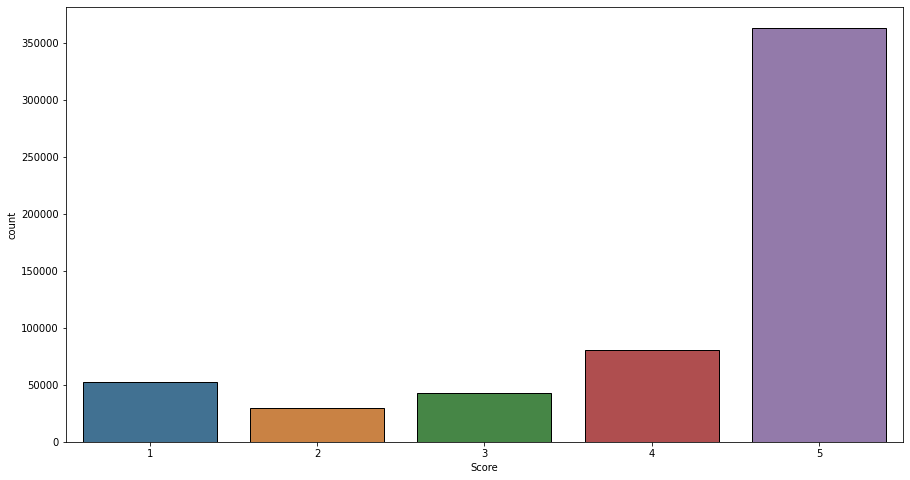

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df['Score'], edgecolor='black', saturation=0.55)
plt.show()

Drop Missing Value

In [ ]:
df.isnull().sum()

Score       0
Summary    27
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df = df.sample(n=10000)

Convert "Summary" dari "object" ke "string"

In [ ]:
df['Summary'] = df['Summary'].astype(str)

Text Cleaning

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string
def text_cleaning(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [ ]:
df['Summary']=df['Summary'].apply(text_cleaning)

In [ ]:
df

,Score,Summary
564339,5,yummy
516849,2,varies in quality
297465,5,great for diabetics
13457,5,perfect storage for homemade baby food
259110,2,unacceptable quality real food toppers chix b...
...,...,...
216945,5,milky way candy by m m mars co
303871,5,good juice small serving for little ones and ...
260271,5,pamela s brand is the best gluten free i ve tr...
333769,5,best cookie in the world


Menghapus data dengan Score = 3, mengubah data dengan Score = 1 dan 2 menjadi 0 dan Score = 4 dan 5 menjadi 1

In [ ]:
df = df[df['Score'] != 3]
x = df['Summary']
y_dict = {1:0, 2:0, 4:1, 5:1}
y = df['Score'].map(y_dict)

Split data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer(ngram_range=(1,2),stop_words='english')
X_train_counts = count_vect.fit_transform(x_train) 
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_new_counts = count_vect.transform(x_test)
X_test_tfidf = tfidf_transformer.transform(X_new_counts)
lr=LogisticRegression(max_iter=100000)

In [ ]:
from sklearn.metrics import accuracy_score
lr.fit(X_train_tfidf,y_train)
pred_1=lr.predict(X_test_tfidf)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.89      0.23      0.37       316
           1       0.86      0.99      0.92      1534

    accuracy                           0.86      1850
   macro avg       0.88      0.61      0.65      1850
weighted avg       0.87      0.86      0.83      1850

Confusion matrix, without normalization
[[  73  243]
 [   9 1525]]


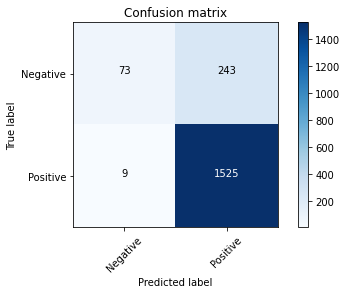

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_1)
np.set_printoptions(precision=2)

print (classification_report(y_test, pred_1))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Negative','Positive'], normalize= False,  title='Confusion matrix')

Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf , y_train)
 
#Predict on test data
pred_mulnb = naive_bayes.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.94      0.10      0.19       316
           1       0.84      1.00      0.91      1534

    accuracy                           0.85      1850
   macro avg       0.89      0.55      0.55      1850
weighted avg       0.86      0.85      0.79      1850

Confusion matrix, without normalization
[[  33  283]
 [   2 1532]]


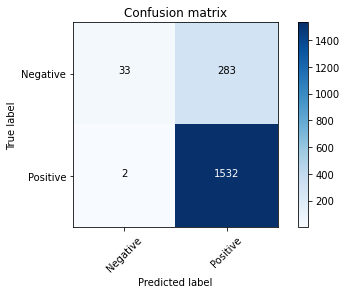

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_mulnb)
np.set_printoptions(precision=2)

print (classification_report(y_test, pred_mulnb))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Negative','Positive'],normalize= False,  title='Confusion matrix')

In [ ]:
from sklearn.naive_bayes import BernoulliNB
naive_bayes_bernoulli = BernoulliNB()
naive_bayes_bernoulli.fit(X_train_tfidf , y_train)
 
#Predict on test data
pred_bernb = naive_bayes_bernoulli.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.83      0.02      0.03       316
           1       0.83      1.00      0.91      1534

    accuracy                           0.83      1850
   macro avg       0.83      0.51      0.47      1850
weighted avg       0.83      0.83      0.76      1850

Confusion matrix, without normalization
[[   5  311]
 [   1 1533]]


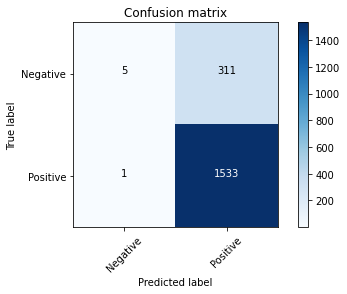

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_bernb)
np.set_printoptions(precision=2)

print (classification_report(y_test, pred_bernb))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Negative','Positive'],normalize= False,  title='Confusion matrix')

Support Vector Machine

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
clf = svm.SVC(kernel='rbf')
clf.fit(X_train_tfidf, y_train) 
predSVM = clf.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.83      0.34      0.48       316
           1       0.88      0.99      0.93      1534

    accuracy                           0.88      1850
   macro avg       0.86      0.66      0.70      1850
weighted avg       0.87      0.88      0.85      1850

Confusion matrix, without normalization
[[ 106  210]
 [  21 1513]]


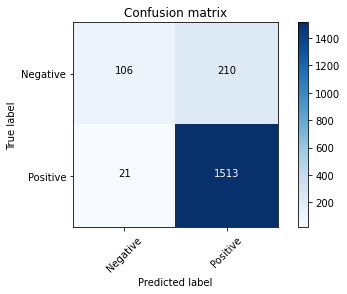

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predSVM)
np.set_printoptions(precision=2)

print (classification_report(y_test, predSVM))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Negative','Positive'],normalize= False,  title='Confusion matrix')

In [ ]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train_tfidf, y_train) 
predSVM2 = clf2.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.78      0.39      0.52       316
           1       0.89      0.98      0.93      1534

    accuracy                           0.88      1850
   macro avg       0.84      0.69      0.73      1850
weighted avg       0.87      0.88      0.86      1850

Confusion matrix, without normalization
[[ 124  192]
 [  34 1500]]


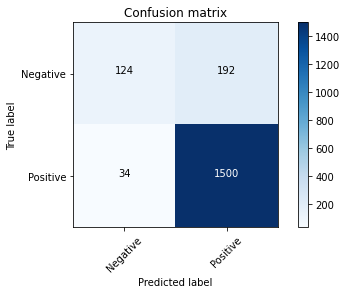

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predSVM2)
np.set_printoptions(precision=2)

print (classification_report(y_test, predSVM2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Negative','Positive'],normalize= False,  title='Confusion matrix')

Artificial Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(64, ), activation='relu',max_iter=1000, epsilon=1e-08)
mlp.fit(X_train_tfidf, y_train)
predANN = mlp.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.63      0.50      0.56       316
           1       0.90      0.94      0.92      1534

    accuracy                           0.86      1850
   macro avg       0.76      0.72      0.74      1850
weighted avg       0.85      0.86      0.86      1850

Confusion matrix, without normalization
[[ 159  157]
 [  95 1439]]


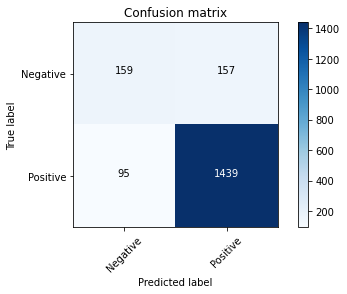

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predANN)
np.set_printoptions(precision=2)

print (classification_report(y_test, predANN))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Negative','Positive'],normalize= False,  title='Confusion matrix')

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [ ]:
predrf = rf.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.72      0.41      0.53       316
           1       0.89      0.97      0.93      1534

    accuracy                           0.87      1850
   macro avg       0.81      0.69      0.73      1850
weighted avg       0.86      0.87      0.86      1850

Confusion matrix, without normalization
[[ 131  185]
 [  50 1484]]


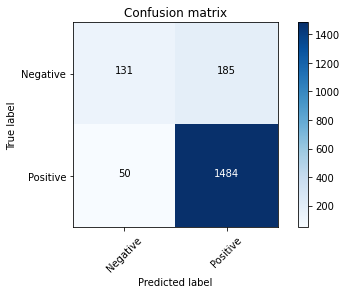

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predrf)
np.set_printoptions(precision=2)

print (classification_report(y_test, predrf))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Negative','Positive'],normalize= False,  title='Confusion matrix')

Mendapatkan "Top 20 positive words" dan "Top 20 negative words" menggunakan Logistic Regression

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_n = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')

def text_fit(X, y, model,clf_model,coef_show=1):
    
    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = model.get_feature_names_out()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))
    
    
text_fit(x, y, tfidf_n, LogisticRegression())

# features: 16327
# train records: 6935
# test records: 2312
Model Accuracy: 0.8589965397923875

-Top 20 positive-
     Word  Coefficient
    great     4.437536
     best     4.114861
     love     3.912001
delicious     3.466199
excellent     2.820353
    yummy     2.677641
 favorite     2.548878
    tasty     2.519270
    loves     2.283771
  awesome     2.203244
wonderful     2.187791
  perfect     2.178749
      yum     2.149815
    treat     1.884443
  amazing     1.870465
     nice     1.538593
fantastic     1.520372
     easy     1.444019
    snack     1.439002
    loved     1.347026

-Top 20 negative-
        Word  Coefficient
        sick    -1.829820
    contains    -1.850246
         rip    -1.858544
        didn    -1.877313
       china    -1.925944
  misleading    -1.932815
       doesn    -1.942336
       nasty    -2.031698
       salty    -2.058560
     warning    -2.079658
        poor    -2.116258
         bad    -2.128688
    horrible    -2.398266
       worst    -2.

Menambahkan kolom "id"

In [ ]:
df["id"] = df.index + 1
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Score,Summary,id
564339,5,yummy,564340
516849,2,varies in quality,516850
297465,5,great for diabetics,297466
13457,5,perfect storage for homemade baby food,13458
259110,2,unacceptable quality real food toppers chix b...,259111
...,...,...,...
190555,5,great drink mix,190556
216945,5,milky way candy by m m mars co,216946
303871,5,good juice small serving for little ones and ...,303872
260271,5,pamela s brand is the best gluten free i ve tr...,260272


Mengimplementasikan Sentiment Intensity Analyzer dari VADERS (Sentiment Analysis)

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Summary']
    myid = row['id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/9247 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'id'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head(20)

,id,neg,neu,pos,compound,Score,Summary
0,564340,0.000,0.000,1.000,0.5267,5,yummy
1,516850,0.000,1.000,0.000,0.0000,2,varies in quality
2,297466,0.000,0.328,0.672,0.6249,5,great for diabetics
3,13458,0.000,0.575,0.425,0.5719,5,perfect storage for homemade baby food
4,259111,0.300,0.700,0.000,-0.4588,2,unacceptable quality real food toppers chix b...
5,310152,0.000,0.580,0.420,0.4404,4,good not birch wood though
6,220626,0.000,0.444,0.556,0.3612,1,tastes like normal m m s
7,273992,0.000,0.556,0.444,0.4927,5,so good i eat it raw
8,536556,0.000,0.543,0.457,0.6369,5,very nutritious and dogs love it
9,199502,0.000,0.323,0.677,0.6369,5,simply the best


Mengimplementasikan roBERTA-base model for Sentiment Analysis

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Summary']
        myid = row['id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/9247 [00:00<?, ?it/s]

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'id'})
results_df = results_df.merge(df, how='left')

In [ ]:
results_df.head(20)

,id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Score,Summary
0,564340,0.000,0.000,1.000,0.5267,0.063130,0.286516,0.650354,5,yummy
1,516850,0.000,1.000,0.000,0.0000,0.195343,0.677551,0.127106,2,varies in quality
2,297466,0.000,0.328,0.672,0.6249,0.135911,0.515931,0.348158,5,great for diabetics
3,13458,0.000,0.575,0.425,0.5719,0.004553,0.164129,0.831318,5,perfect storage for homemade baby food
4,259111,0.300,0.700,0.000,-0.4588,0.895079,0.096453,0.008468,2,unacceptable quality real food toppers chix b...
5,310152,0.000,0.580,0.420,0.4404,0.060376,0.387711,0.551913,4,good not birch wood though
6,220626,0.000,0.444,0.556,0.3612,0.084681,0.621358,0.293961,1,tastes like normal m m s
7,273992,0.000,0.556,0.444,0.4927,0.007765,0.036001,0.956234,5,so good i eat it raw
8,536556,0.000,0.543,0.457,0.6369,0.003619,0.039073,0.957309,5,very nutritious and dogs love it
9,199502,0.000,0.323,0.677,0.6369,0.011399,0.088633,0.899967,5,simply the best
